# CREATING AN LSTM MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 
import datetime

In [2]:
start =  datetime.datetime(1999, 1, 1)
end =  datetime.datetime(2022, 12, 31)

df = data.DataReader('AAPL','stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,128.41,129.9500,127.43,129.93,77034209.0
2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
2022-12-23,130.92,132.4150,129.64,131.86,63814893.0


In [3]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
1999-01-08,0.354379,0.356812,0.334878,0.342466,7.963605e+08
1999-01-07,0.321510,0.343124,0.320602,0.342466,1.676430e+09
1999-01-06,0.335756,0.335756,0.312068,0.317781,1.582052e+09
1999-01-05,0.319057,0.334320,0.316006,0.329664,1.654251e+09
1999-01-04,0.320602,0.321510,0.304541,0.313812,1.117861e+09


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-30,128.41,129.9500,127.43,129.93,77034209.0
1,2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2,2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
3,2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
4,2022-12-23,130.92,132.4150,129.64,131.86,63814893.0


In [5]:
df=df.dropna()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-30,128.41,129.9500,127.43,129.93,77034209.0
1,2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2,2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
3,2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
4,2022-12-23,130.92,132.4150,129.64,131.86,63814893.0


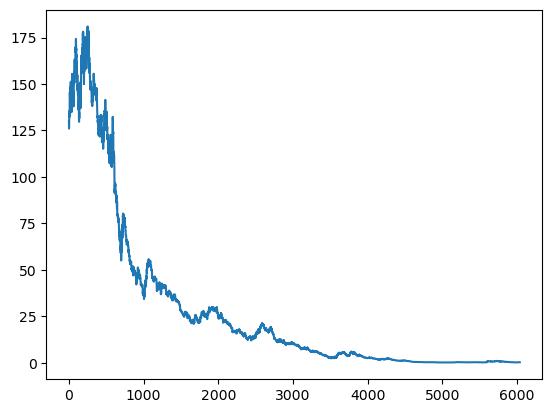

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6033    0.298076
6034    0.297956
6035    0.297722
6036    0.297664
6037    0.297490
Name: Close, Length: 6038, dtype: float64

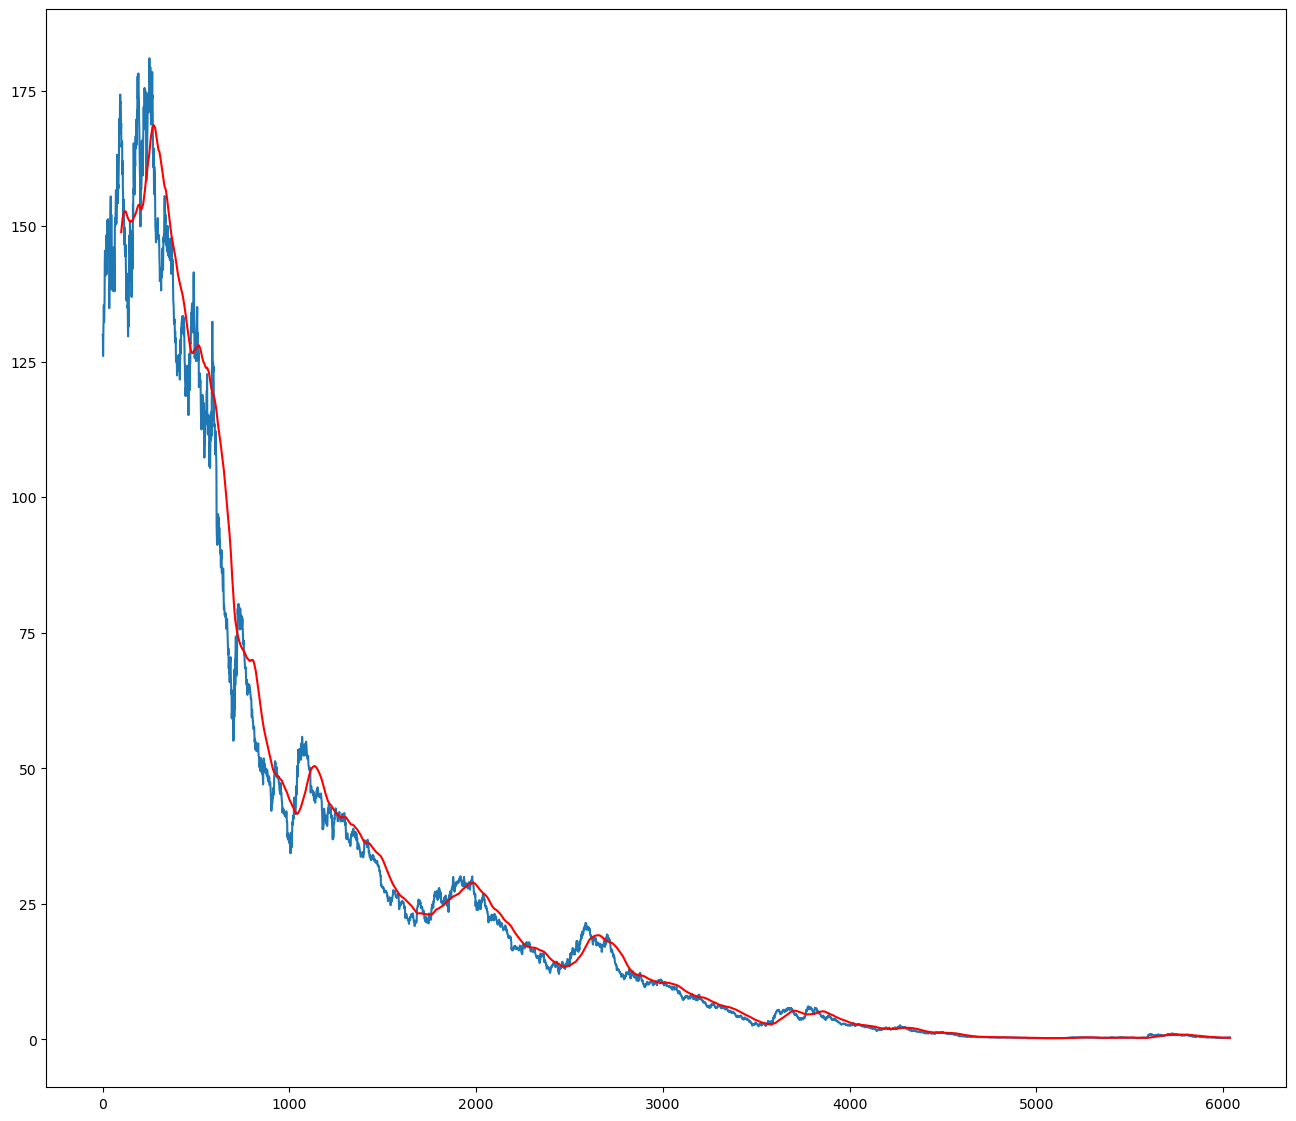

In [8]:
plt.figure(figsize=(16,14))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6033    0.374368
6034    0.373267
6035    0.371959
6036    0.370749
6037    0.369712
Name: Close, Length: 6038, dtype: float64

Text(0.5, 1.0, 'CLOSING VALUE vs 100 DAYS MA vs 200 DAYS MA')

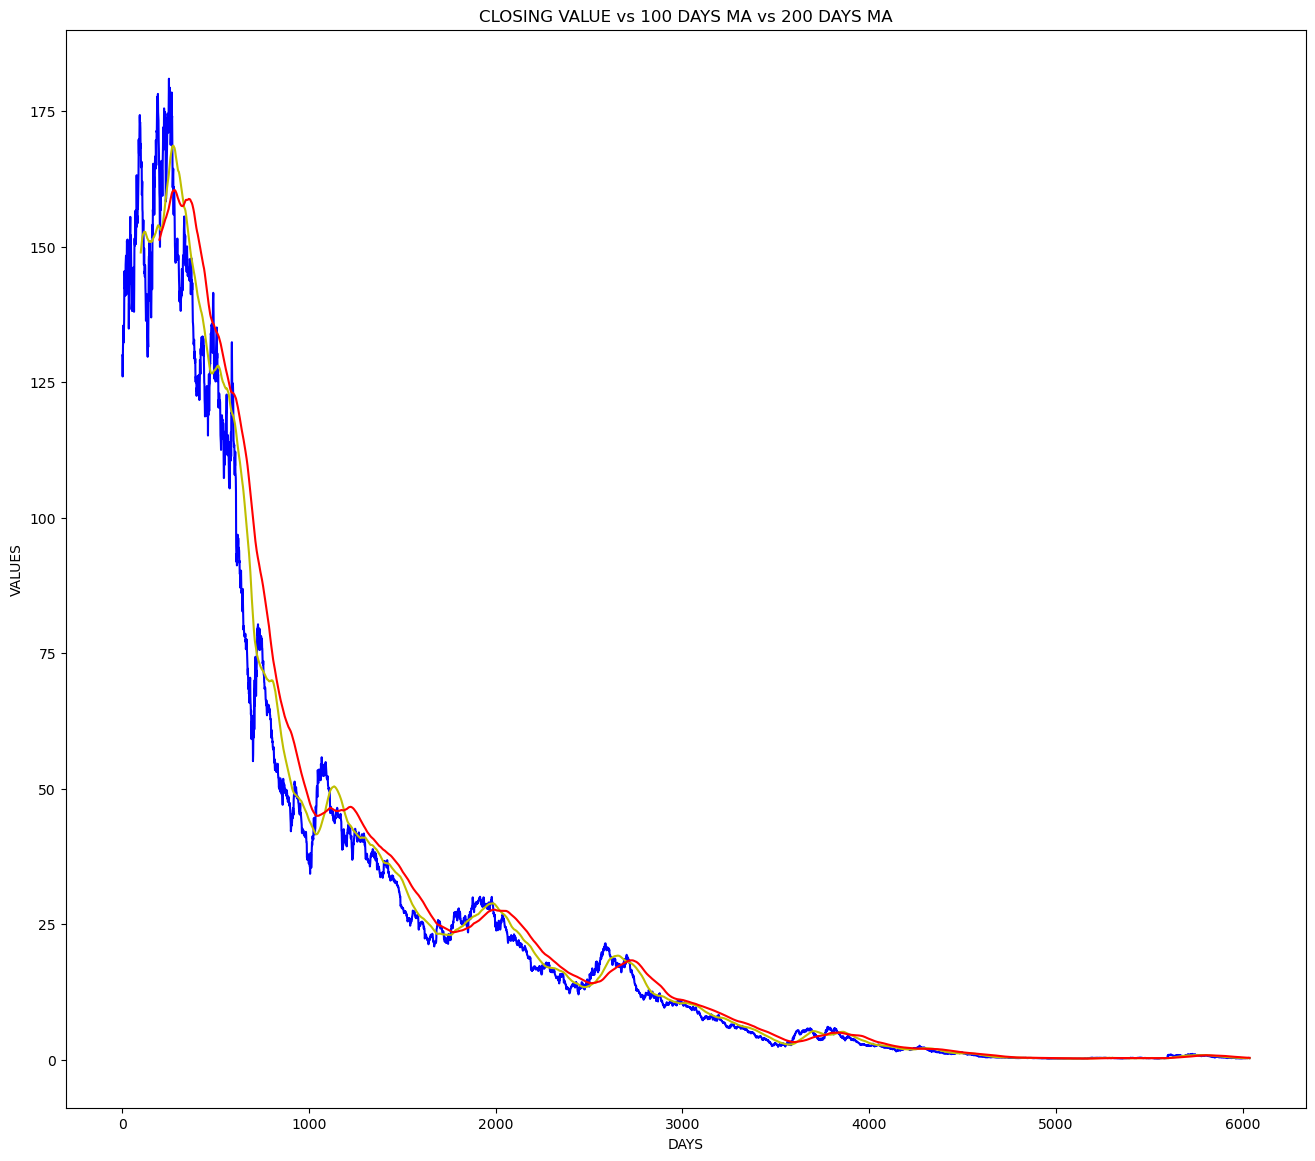

In [10]:
plt.figure(figsize=(16,14))
plt.plot(df.Close,'b')
plt.plot(ma100,'y')
plt.plot(ma200,'r')
plt.xlabel('DAYS')
plt.ylabel('VALUES')
plt.title('CLOSING VALUE vs 100 DAYS MA vs 200 DAYS MA')

In [11]:
df.shape

(6038, 6)

In [12]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.700)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.700):int(len(df))])

# Let's see how our data is divided...
print("",data_training.shape,"\n",data_testing.shape)

 (4226, 1) 
 (1812, 1)


In [13]:
data_training.head()

,Close
0,129.93
1,129.61
2,126.04
3,130.03
4,131.86


In [14]:
data_testing.head()

,Close
4226,1.94816
4227,1.96849
4228,1.95763
4229,2.01625
4230,2.04955


In [15]:
# We've to scale down the data for the values b/w 0 &1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.71558742],
       [0.71380385],
       [0.69390589],
       ...,
       [0.00160978],
       [0.00186656],
       [0.00189042]])

In [17]:
# Most importatant step...

x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)


In [18]:
x_train.shape

(4126, 100, 1)

## Machine Learning Model

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [21]:
model = Sequential()
model.add(LSTM(units=50,activation='tanh',return_sequences = True,
                   input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='tanh',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='tanh',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


2023-09-29 23:48:31.716149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 23:48:32.228850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 23:48:33.265558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 23:48:33.944656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 23:48:34.591361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 23:48:36.705468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-29 23:48:38.450999: I tensorflow/core/grappler/optimizers/cust

129/129 [==============================] - 18s 47ms/step - loss: 0.0038
Epoch 2/50
129/129 [==============================] - 4s 29ms/step - loss: 5.7737e-04
Epoch 3/50
129/129 [==============================] - 14s 105ms/step - loss: 7.3483e-04
Epoch 4/50
129/129 [==============================] - 4s 31ms/step - loss: 5.8237e-04
Epoch 5/50
129/129 [==============================] - 4s 32ms/step - loss: 4.8514e-04
Epoch 6/50
129/129 [==============================] - 4s 31ms/step - loss: 5.3491e-04
Epoch 7/50
129/129 [==============================] - 4s 32ms/step - loss: 4.2541e-04
Epoch 8/50
129/129 [==============================] - 4s 31ms/step - loss: 3.9003e-04
Epoch 9/50
129/129 [==============================] - 4s 29ms/step - loss: 3.6564e-04
Epoch 10/50
129/129 [==============================] - 4s 34ms/step - loss: 4.1036e-04
Epoch 11/50
129/129 [==============================] - 4s 31ms/step - loss: 3.2876e-04
Epoch 12/50
129/129 [==============================] - 4s 31ms/s

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
4226,1.94816
4227,1.96849
4228,1.95763
4229,2.01625
4230,2.04955


In [27]:
data_training.tail(100)

,Close
4126,1.95065
4127,1.93590
4128,1.97209
4129,2.04616
4130,2.07916
...,...
4221,1.81167
4222,1.82533
4223,1.83141
4224,1.87748


In [28]:
past_100_days = data_training.tail(100)

In [30]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

,Close
0,1.95065
1,1.93590
2,1.97209
3,2.04616
4,2.07916


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.72784136],
       [0.72170988],
       [0.73675383],
       ...,
       [0.04906845],
       [0.05400814],
       [0.04741856]])

In [33]:
input_data.shape

(1912, 1)

In [34]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [35]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1812, 100, 1)
(1812,)


In [37]:
# Model Prediction

y_predicted = model.predict(x_test)

57/57 [==============================] - 1s 11ms/step


In [38]:
y_predicted.shape


(1812, 1)

In [39]:
y_test

array([0.72680628, 0.73525733, 0.7307429 , ..., 0.04906845, 0.05400814,
       0.04741856])

In [40]:
y_predicted

array([[0.60102   ],
       [0.6120191 ],
       [0.6235359 ],
       ...,
       [0.07554293],
       [0.07478637],
       [0.07295353]], dtype=float32)

In [41]:
scaler.scale_

array([0.41569342])

In [42]:
scale_factor  = 1/ 0.41569342
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

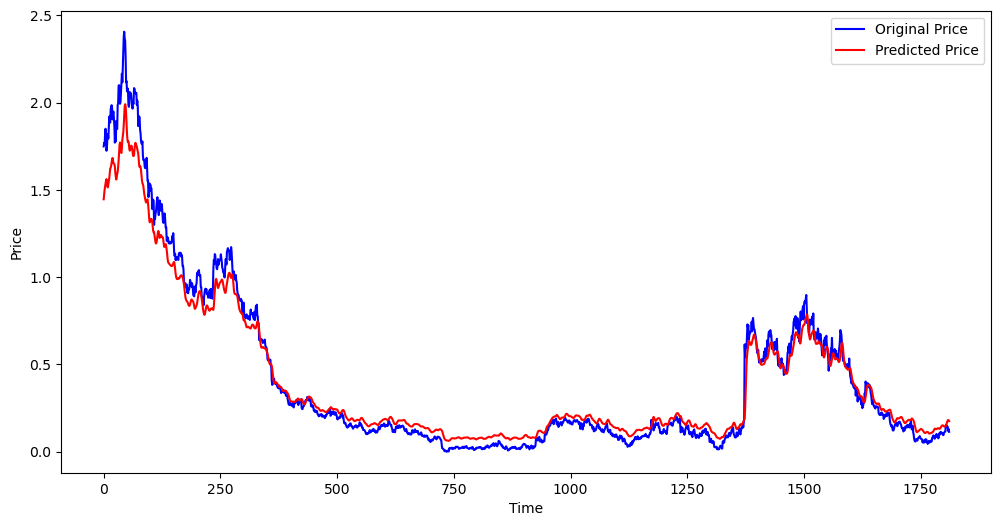

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()